<a href="https://colab.research.google.com/github/DanielDialektico/Machine-Learning/blob/main/k-medias/K%20Medias%20Estrellas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

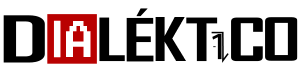

# 1. Introducción
En esta libreta se presenta un modelo de K-medias aplicado a un **conjunto de datos de estrellas** y sus propiedades físicas. El fin es crear tres agrupaciones de estrellas de acuerdo a tres de estas característcas, ejemplificando el uso del **aprendizaje no supervisado** para la estructuración de información no etiquetada. 

# 2. Carga de la información y exploración del conjunto de datos
El conjunto de datos se carga desde mi repositorio de **GitHub**. La información general sobre este conjunto de datos se especifica en el **apéndice** al final.

Antes de hacer uso del algoritmo de k-medias, se procede a hacer una efímera exploración de los datos. En este bloque se utiliza la función *head* de Pandas para imprimir los primeros cinco renglones y las 7 columnas del arreglo, esto para obtener un primer vistazo de la tabla generada.

In [ ]:
#Se importan las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

#Se carga el conjunto de datos desde GitHub
dataset = pd.read_csv('https://raw.githubusercontent.com/DanielDialektico/Machine-Learning/main/k-medias/estrellas_data_2.csv')

#Se imprime el encabezado
dataset.head()

Con el fin de identificar los tipos de valores embebidos en los datos, y posibles valores nulos, se imprime un resumen informativo utilizando la función info() de Pandas, donde se constata que se cuentan con valores de tipo **enteros, flotantes, y objetos (solo para un atributo)**. Además, se aprecia la **ausencia de valores nulos**.

In [ ]:
dataset.info()

Con el fin de trabajar sobre un espacio desplegable en gráficas, se seleccionan tres atributos del conjunto de datos: **Distancia**, **Magnitud absoluta**, e **Índice de color**. 
Se crea una gráfica tridimensional de este subconjunto con el fin de observar su distribución.

In [ ]:
#Se grafican los valores de los 3 atributos seleccionados.
graph_3d = plt.figure(figsize=(10,8)).gca(projection='3d')
graph_3d.scatter(dataset['Distancia'], dataset['Magnitud absoluta'], dataset['Índice de color'])
plt.show()

# 3. Preprocesamiento

De forma intuitiva, se pueden observar posibles **valores atípicos** (puntos alejados del mayor conglomerado). Para eliminar estos valores atípicos se procede a imprimir la distribución particular de cada atributo, además de su gráfico de caja con el fin de obtener una visualización de estos.

In [ ]:
warnings.filterwarnings('ignore')

#Se generan las gráficas de distribución y de caja para cada variable.
plt.figure(figsize=(16,8))
plt.subplot(3,2,1)
sns.distplot(dataset['Distancia'])
plt.subplot(3,2,2)
sns.boxplot(dataset['Distancia'])
plt.figure(figsize=(16,8))
plt.subplot(3,2,3)
sns.distplot(dataset['Magnitud absoluta'])
plt.subplot(3,2,4)
sns.boxplot(dataset['Magnitud absoluta'])
plt.figure(figsize=(16,8))
plt.subplot(3,2,5)
sns.distplot(dataset['Índice de color'])
plt.subplot(3,2,6)
sns.boxplot(dataset['Índice de color'])

Debido a que se tienen distribuciones que no tienen una **distribución normal**, se procede a eliminar los valores atípicos utilizando el método por rango intercuartílico, en el que se desechan los puntos que estén por debajo y por arriba del espacio determinado por el primer y tercer cuartil. 

In [ ]:
#Se crea una función que realice los cálculos de los límites inferiores y superiores del rango intercuartílico
def iqrFilter(data):
  percentile25 = dataset[data].quantile(0.25)
  percentile75 = dataset[data].quantile(0.75)
  iqr = percentile75 - percentile25
  
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  
  return upper_limit,lower_limit

#Se aplica la función para la definición de los límites de cada columna
upperD,lowerD = iqrFilter('Distancia')
upperM,lowerM = iqrFilter('Magnitud absoluta')
upperI,lowerI = iqrFilter('Índice de color')  

#Se eliminan los valores que no pertenezcan al rango establecido.
dataset = dataset[dataset['Distancia'] > lowerD]
dataset = dataset[dataset['Distancia'] < upperD]
dataset = dataset[dataset['Magnitud absoluta'] > lowerM]
dataset = dataset[dataset['Magnitud absoluta'] < upperM]
dataset = dataset[dataset['Índice de color'] > lowerI]
dataset = dataset[dataset['Índice de color'] < upperI]

Una vez realizado el filtrado, se grafican de nuevo los puntos correspondientes al subconjunto seleccionando, lo cual muestra una **disminución visible de los valores atípicos**. Dado que el fin de este trabajo es aplicar un algoritmo de agrupación y ya se tiene una forma más centrada de los datos, no se aplican más pruebas y filtros para posibles residuos. 

In [ ]:
#Se grafican los valores de los 3 atributos seleccionados.
graph_3d = plt.figure(figsize=(10,8)).gca(projection='3d')
graph_3d.scatter(dataset['Distancia'], dataset['Magnitud absoluta'], dataset['Índice de color'])
plt.show()

# 4. Agrupación con k-medias
Se procede a utilizar el modelo de **k-medias**, especificando un número de agrupaciones igual a tres, lo cual generará esta cantidad de conglomerados al rededor de 3 **centroides** diferentes.

In [ ]:
#Se definen los atributos seleccionados como un arreglo de numpy para ser utilizados en nuestro modelo.
attributes = np.array(dataset[['Distancia', 'Magnitud absoluta', 'Índice de color']])

#Se configura el modelo con 3 agrupaciones.
kmeans = KMeans(n_clusters=3).fit(attributes)
#Se obtiene el valor de los centroides.
centroids = kmeans.cluster_centers_

Para observar los resultados, se muestran las tres agrupaciones generadas utilizando como distintivo un color diferente para cada una. 

In [ ]:
#Se utiliza el modelo para señalar a qué agrupación pertenece cada grupo
labels = kmeans.predict(attributes)
C = kmeans.cluster_centers_

colors=['red','green','blue']
points_colors=[]
for row in labels:
    points_colors.append(colors[row])
graph_3d = plt.figure(figsize=(10,8)).gca(projection='3d')
graph_3d.scatter(dataset['Distancia'], dataset['Magnitud absoluta'], dataset['Índice de color'], c = points_colors)
plt.show()

Para finalizar, se grafican los puntos de nuevo, esta vez seleccionando un grosor más bajo para cada uno, y añadiendo tres círculos de cada color, los cuales representan a los **centroides** generados por el modelo.

In [ ]:
graph_3d = plt.figure(figsize=(10,8)).gca(projection='3d')
graph_3d.scatter(dataset['Distancia'], dataset['Magnitud absoluta'], dataset['Índice de color'], c = points_colors, s= 1)
graph_3d.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', c = colors, s=1000)
plt.show()

Encuentra más códigos como este y las explicaciones de los modelos en https://dialektico.com/

# 5. Apéndice

### **Conjunto de datos**
El conjunto de datos  utilizado para este trabajo fue descargado de https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs. Consiste en una base de datos de 3,642 estrellas y sus características, obtenida de la herramienta de consulta de catálogos astronómicos [Vizier](https://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I%2F239%2Fhip_main&-out.max=50&-out.form=HTML+Table&-out.add=_RAJ%2C_DEJ&-sort=_r&-oc.form=sexa). 
Para mayor detalles visitar la **primer URL**. 
